In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
df=pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
x=df.iloc[:,[1,2,3,5,7]]
y=df.iloc[:,8]

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,BMI,Age
60,84,0,0,0.0,21
618,112,82,24,28.2,50
346,139,46,19,28.7,22
294,161,50,0,21.9,65
231,134,80,37,46.2,46


In [27]:
X_train.shape


(614, 5)

In [28]:
y_train.shape

(614,)

C:\Users\Shantanoo Aher\AppData\Local\Temp\ipykernel_17588\1178745140.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


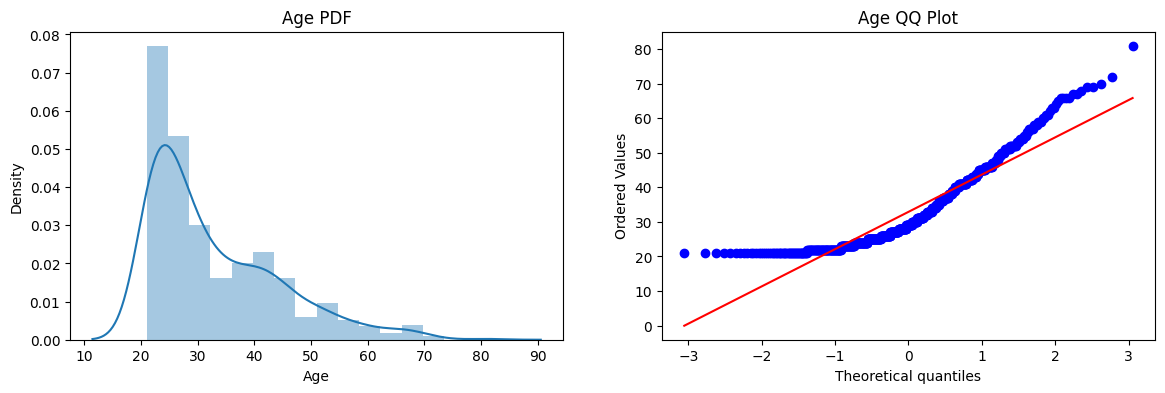

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ Plot")

plt.show()

C:\Users\Shantanoo Aher\AppData\Local\Temp\ipykernel_17588\1307688325.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Glucose'])


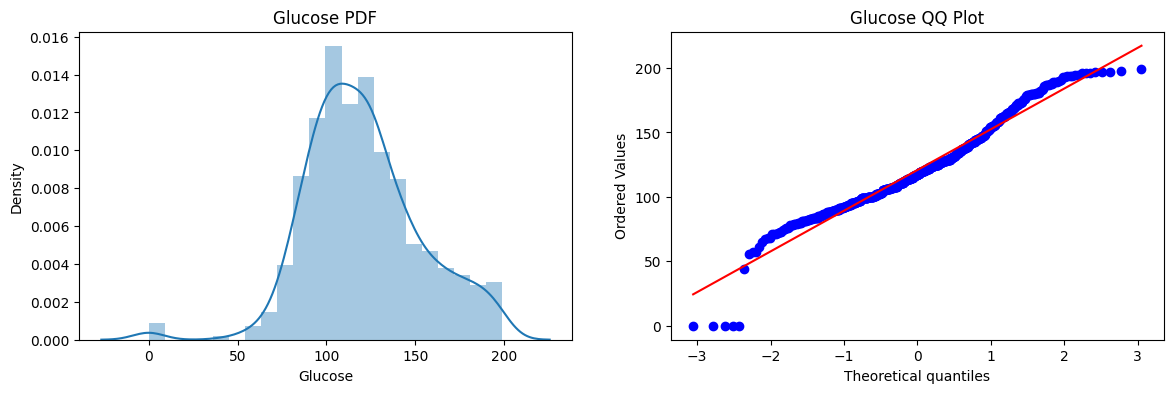

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Glucose'])
plt.title("Glucose PDF")

plt.subplot(122)
stats.probplot(X_train['Glucose'],dist='norm',plot=plt)
plt.title("Glucose QQ Plot")

plt.show()

In [40]:
LR=LogisticRegression()
Clf=DecisionTreeClassifier()

In [42]:
LR.fit(X_train,y_train)
Clf.fit(X_train,y_train)

y_pred=LR.predict(X_test)
Y_pred=Clf.predict(X_test)

print("Accuracy Score LR",accuracy_score(y_test,y_pred))
print("Accuracy Score Clf",accuracy_score(y_test,Y_pred))

Accuracy Score LR 0.7402597402597403
Accuracy Score Clf 0.6753246753246753


In [44]:
Trf=FunctionTransformer(func=np.log1p)

In [46]:
X_train_transformed=Trf.fit_transform(X_train)
X_test_transformed=Trf.transform(X_test)

In [47]:
LR=LogisticRegression()
clf=DecisionTreeClassifier()

In [49]:
LR.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)

y_pred=LR.predict(X_test_transformed)
y_pred1=clf.predict(X_test_transformed)

print("Accuracy Score LR",accuracy_score(y_test,y_pred))
print("Accuracy Score clf",accuracy_score(y_test,y_pred))

Accuracy Score LR 0.6948051948051948
Accuracy Score clf 0.6948051948051948


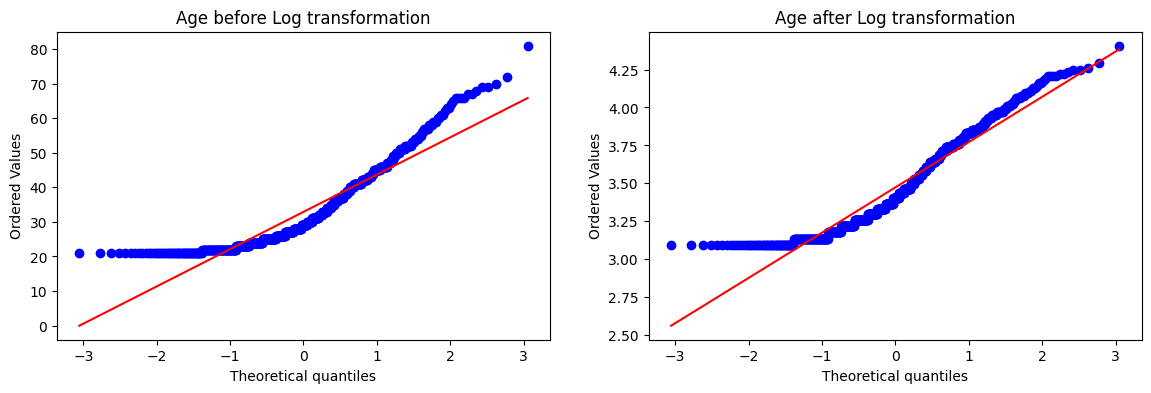

In [50]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title("Age before Log transformation")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title("Age after Log transformation")
plt.show()

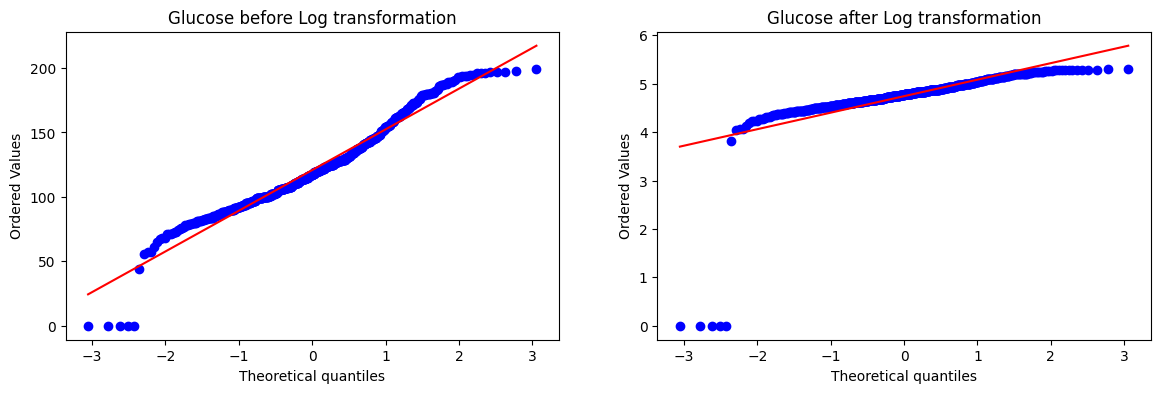

In [51]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Glucose'],dist="norm",plot=plt)
plt.title("Glucose before Log transformation")

plt.subplot(122)
stats.probplot(X_train_transformed['Glucose'],dist="norm",plot=plt)
plt.title("Glucose after Log transformation")
plt.show()